# **Project Name**    - **Tokyo 2020 Olympics: Exploratory Data Analysis**



# **Project Summary**

For this project, I will analyze data from the Tokyo 2020 Olympics to uncover patterns in athlete participation, performance and global representation. I have downloaded a Kaggle dataset in ZIP format that contains five excel files: athletes, coaches, medals, gender and teams. I plan to carefully inspect each dataset, review its structure and clean it where necessary to ensure accuracy and consistency. My initial steps will involve understanding the purpose of each file, exploring data types and key variables and checking for duplicates or missing values to prepare the data for deeper exploration.

Once the data is ready, I will conduct a detailed analysis of athlete participation across countries, sports, and events, highlighting which nations sent the largest delegations and in which sports they excelled. I will also examine medal distribution, comparing total medal counts, gold medal rankings, and efficiency metrics to identify standout performances. Gender representation will be another key focus, where I plan to visualize the participation of male and female athletes across different sports to see how balanced the competition was. Additionally, I will analyze coaching support structures, investigate correlations between coaching staff and team performance and highlight any interesting patterns among smaller or high-achieving delegations.

Throughout the project, I will use clear and engaging visualizations, such as bar charts, pie charts and line graphs, to communicate key findings. The goal is to create a comprehensive and visually appealing overview of the Tokyo 2020 Olympics that demonstrates data cleaning, exploration and storytelling skills while uncovering valuable insights.


# **Problem Statement**


The 2021 Tokyo Olympics featured thousands of athletes competing across multiple sports, generating a vast dataset of results, medals and performance metrics. However, this raw data alone doesn’t provide clear insights into participation trends, country-wise performance, gender representation, or event-specific dominance. This project aims to perform Exploratory Data Analysis (EDA) on the Tokyo 2021 Olympics dataset to uncover patterns, highlight key statistics and visualize meaningful insights that make the global sporting event easier to understand and analyze.


## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Athletes.xlsx to Athletes.xlsx
Saving Coaches.xlsx to Coaches.xlsx
Saving EntriesGender.xlsx to EntriesGender.xlsx
Saving Medals.xlsx to Medals.xlsx
Saving Teams.xlsx to Teams.xlsx


In [3]:
athletes_df = pd.read_excel('Athletes.xlsx')
coaches_df = pd.read_excel('Coaches.xlsx')
gender_df = pd.read_excel('EntriesGender.xlsx')
medals_df = pd.read_excel('Medals.xlsx')
teams_df = pd.read_excel('Teams.xlsx')

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Dataset First View

In [4]:
display(athletes_df.head())
display(coaches_df.head())
display(gender_df.head())
display(medals_df.head())
display(teams_df.head())

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


### Dataset Rows & Columns count

In [5]:
print(athletes_df.shape)
print(coaches_df.shape)
print(gender_df.shape)
print(medals_df.shape)
print(teams_df.shape)

(11085, 3)
(394, 4)
(46, 4)
(93, 7)
(743, 4)


### Dataset Information

In [6]:
print(athletes_df.info)
print(coaches_df.info)
print(gender_df.info)
print(medals_df.info)
print(teams_df.info)

<bound method DataFrame.info of                         Name      NOC           Discipline
0            AALERUD Katrine   Norway         Cycling Road
1                ABAD Nestor    Spain  Artistic Gymnastics
2          ABAGNALE Giovanni    Italy               Rowing
3             ABALDE Alberto    Spain           Basketball
4              ABALDE Tamara    Spain           Basketball
...                      ...      ...                  ...
11080  ZWICKER Martin Detlef  Germany               Hockey
11081      ZWOLINSKA Klaudia   Poland         Canoe Slalom
11082           ZYKOVA Yulia      ROC             Shooting
11083      ZYUZINA Ekaterina      ROC              Sailing
11084        ZYZANSKA Sylwia   Poland              Archery

[11085 rows x 3 columns]>
<bound method DataFrame.info of                        Name                         NOC         Discipline  \
0           ABDELMAGID Wael                       Egypt           Football   
1                 ABE Junya                  

#### Duplicate Values

In [7]:
print("Athletes duplicates:", athletes_df.duplicated().sum())
print("Coaches duplicates:", coaches_df.duplicated().sum())
print("Gender duplicates:", gender_df.duplicated().sum())
print("Medals duplicates:", medals_df.duplicated().sum())
print("Teams duplicates:", teams_df.duplicated().sum())


Athletes duplicates: 1
Coaches duplicates: 1
Gender duplicates: 0
Medals duplicates: 0
Teams duplicates: 0


#### Missing Values/Null Values

In [8]:
print("Athletes duplicates:", athletes_df.isnull().sum())
print("Coaches duplicates:", coaches_df.isnull().sum())
print("Gender duplicates:", gender_df.isnull().sum())
print("Medals duplicates:", medals_df.isnull().sum())
print("Teams duplicates:", teams_df.isnull().sum())

Athletes duplicates: Name          0
NOC           0
Discipline    0
dtype: int64
Coaches duplicates: Name            0
NOC             0
Discipline      0
Event         145
dtype: int64
Gender duplicates: Discipline    0
Female        0
Male          0
Total         0
dtype: int64
Medals duplicates: Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64
Teams duplicates: Name          0
Discipline    0
NOC           0
Event         0
dtype: int64


In [9]:
coaches_df['event'] = coaches_df['Event'].fillna('Unknown')

### What did you know about your dataset?



This dataset provides a detailed look at the Tokyo 2021 Olympics, split across five Excel files. The Athletes dataset contains information on 11,085 athletes across 3 columns (Name, NOC, Discipline). The Coaches dataset has 394 entries, including the coach name, nationality, discipline and associated event, with some missing values in the Event column. EntriesGender captures the gender distribution for each discipline, listing male, female, and total participants. The Medals dataset summarizes medal counts by country, showing gold, silver, bronze, and total rankings for 93 teams/NOCs. Lastly, the Teams dataset details all participating teams across various sports and events, covering 743 records. Together, these datasets give a comprehensive view of Olympic participation, performance, and representation across nations and sports.


## ***2. Understanding Your Variables***

### Variables Description

🏋️ Athletes Dataset

| Column         | Description                                                         |
| -------------- | ------------------------------------------------------------------- |
| **Name**       | Full name of the athlete.                                           |
| **NOC**        | National Olympic Committee code representing the athlete’s country. |
| **Discipline** | Sport or discipline the athlete competed in.                        |


👨‍🏫 Coaches Dataset

| Column         | Description                                                         |
| -------------- | ------------------------------------------------------------------- |
| **Name**       | Full name of the coach.                                             |
| **NOC**        | National Olympic Committee code representing the coach’s country.   |
| **Discipline** | Sport or discipline the coach is associated with.                   |
| **Event**      | Specific event within the discipline (contains **missing values**). |

🚻 EntriesGender Dataset

| Column         | Description                                           |
| -------------- | ----------------------------------------------------- |
| **Discipline** | Sport or discipline name.                             |
| **Female**     | Number of female athletes entered in that discipline. |
| **Male**       | Number of male athletes entered in that discipline.   |
| **Total**      | Total number of athletes in that discipline.          |

🏅 Medals Dataset

| Column       | Description                                   |
| ------------ | --------------------------------------------- |
| **Team/NOC** | Team or National Olympic Committee name/code. |
| **Gold**     | Number of gold medals won by the team.        |
| **Silver**   | Number of silver medals won.                  |
| **Bronze**   | Number of bronze medals won.                  |
| **Total**    | Total number of medals won.                   |
| **Rank**     | Overall ranking based on medal count.         |

🌍 Teams Dataset

| Column         | Description                                             |
| -------------- | ------------------------------------------------------- |
| **Name**       | Name of the team or country.                            |
| **Discipline** | Sport or discipline the team is participating in.       |
| **NOC**        | National Olympic Committee code for the team’s country. |
| **Event**      | Specific event within the discipline.                   |



## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

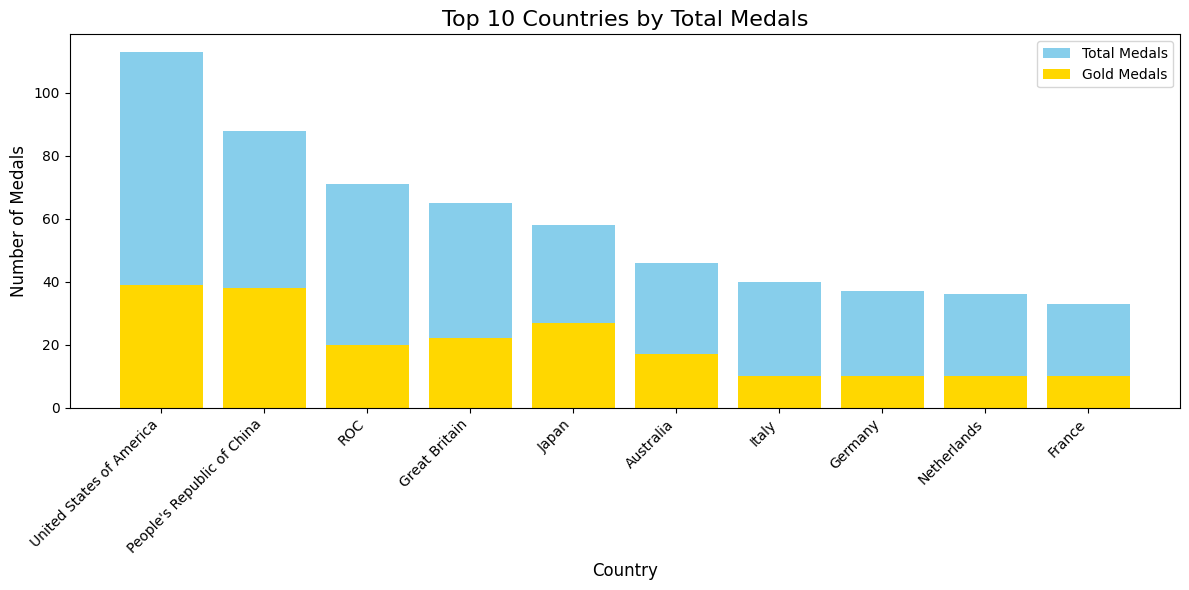

In [10]:

# calculate total medals per country
medals_df['Total'] = medals_df['Gold'] + medals_df['Silver'] + medals_df['Bronze']

# Sort by total medals
top_countries = medals_df.sort_values(by='Total', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Team/NOC'], top_countries['Total'], color='skyblue', label='Total Medals')
plt.bar(top_countries['Team/NOC'], top_countries['Gold'], color='gold', label='Gold Medals')

plt.title('Top 10 Countries by Total Medals', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


### Insights found from the chart

The **United States** leads the medal tally with over **100 total medals**, including around **40 golds**, showing clear dominance. **China** follows closely in gold count but falls short of **90 total medals** overall. Rounding out the **top 10** are powerhouses like **Italy, Germany, the Netherlands, and France**, all showcasing strong all-around performances but with a noticeable gap compared to the US and China.


#### Chart - 2

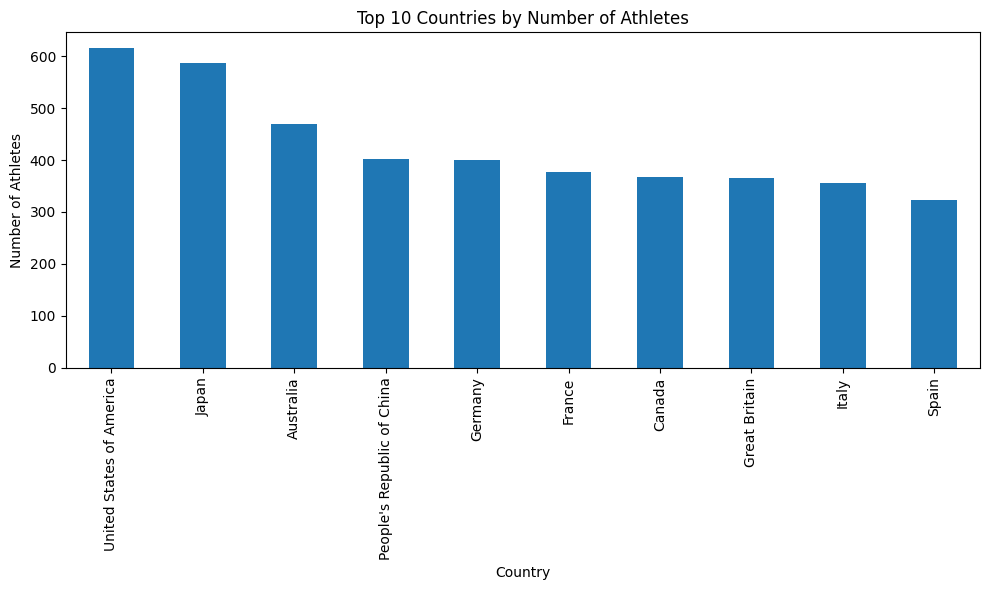

In [21]:
# Count number of athletes per country
athletes_per_country = athletes_df['NOC'].value_counts()


# Plot top 10 countries by number of athletes
athletes_per_country.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Countries by Number of Athletes')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Insights found from the chart

The United States leads with over 600 athletes, followed closely by Japan with nearly 600. Australia, France and Germany take the next spots, with Canada Netherlands, Italy, and Spain completing the top 10. This shows the depth of participation across traditional sporting powerhouses.


#### Chart - 3

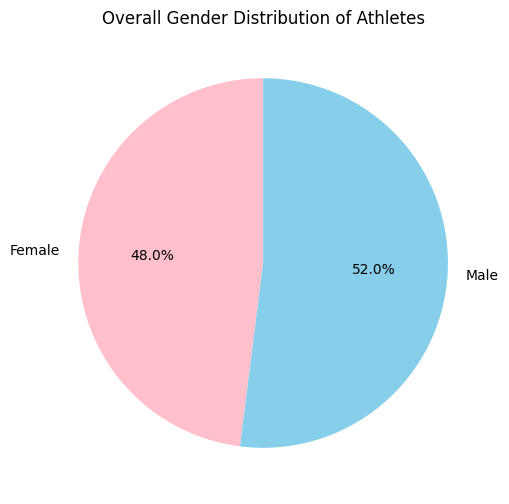

In [12]:

total_males = gender_df['Male'].sum()
total_females = gender_df['Female'].sum()

# Data for plotting
gender_counts = [total_females, total_males]
labels = ['Female', 'Male']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts,
    labels=labels,
    autopct='%1.1f%%',  # show percentages
    startangle=90,
    colors=['pink', 'skyblue']
)
plt.title('Overall Gender Distribution of Athletes')
plt.show()


### Insights found from the chart

More than half of the athletes are men, making up around **52%** of the total participants, while women account for the remaining **48%**. The gender split is fairly balanced overall.


#### Chart - 4

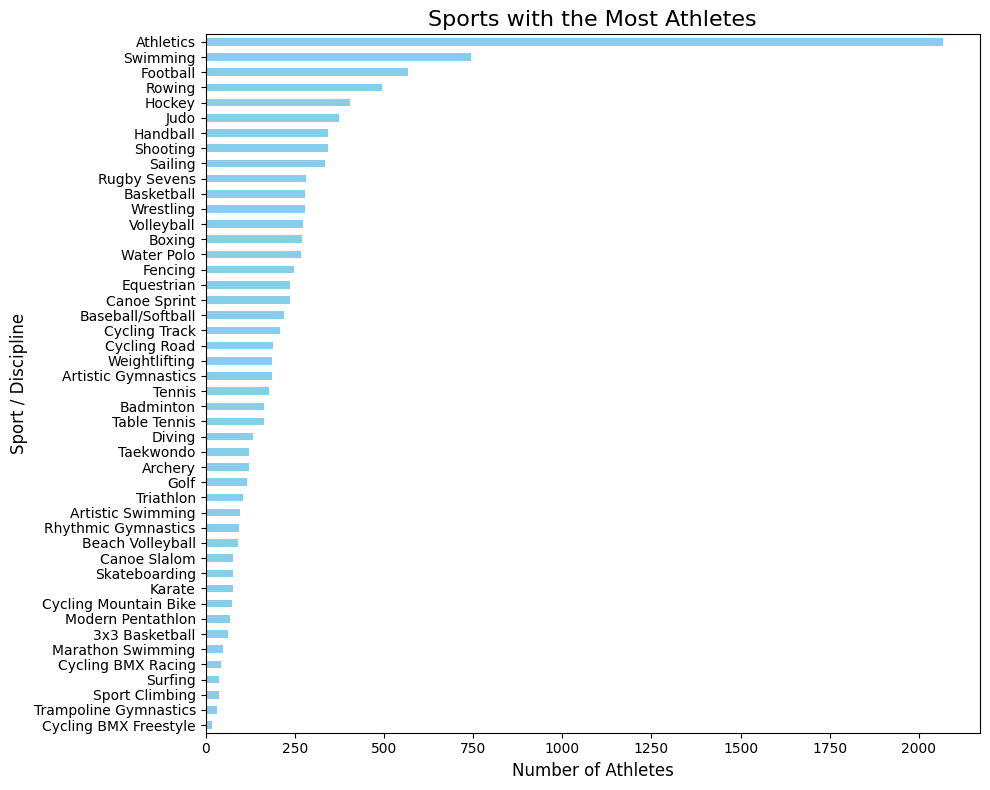

In [13]:

# Count athletes per sport
sport_athletes =athletes_df['Discipline'].value_counts().sort_values(ascending=True)

# Horizontal bar chart
plt.figure(figsize=(10, 8))
sport_athletes.plot(kind='barh', color='skyblue')

plt.title("Sports with the Most Athletes", fontsize=16)
plt.xlabel("Number of Athletes", fontsize=12)
plt.ylabel("Sport / Discipline", fontsize=12)
plt.tight_layout()
plt.show()


### Insights found from the chart


Athletics dominates participation with **over 2,000 athletes**, making it by far the largest sport in terms of competitors. **Swimming** follows at a distant second with around **750 athletes**, while **Football** comes third with **500+ participants**. After that, **Rowing** and **Hockey** round out the top five, both with noticeably fewer athletes compared to the leading sports. This highlights how Athletics draws a significantly larger athlete pool than any other discipline.  


#### Chart - 5

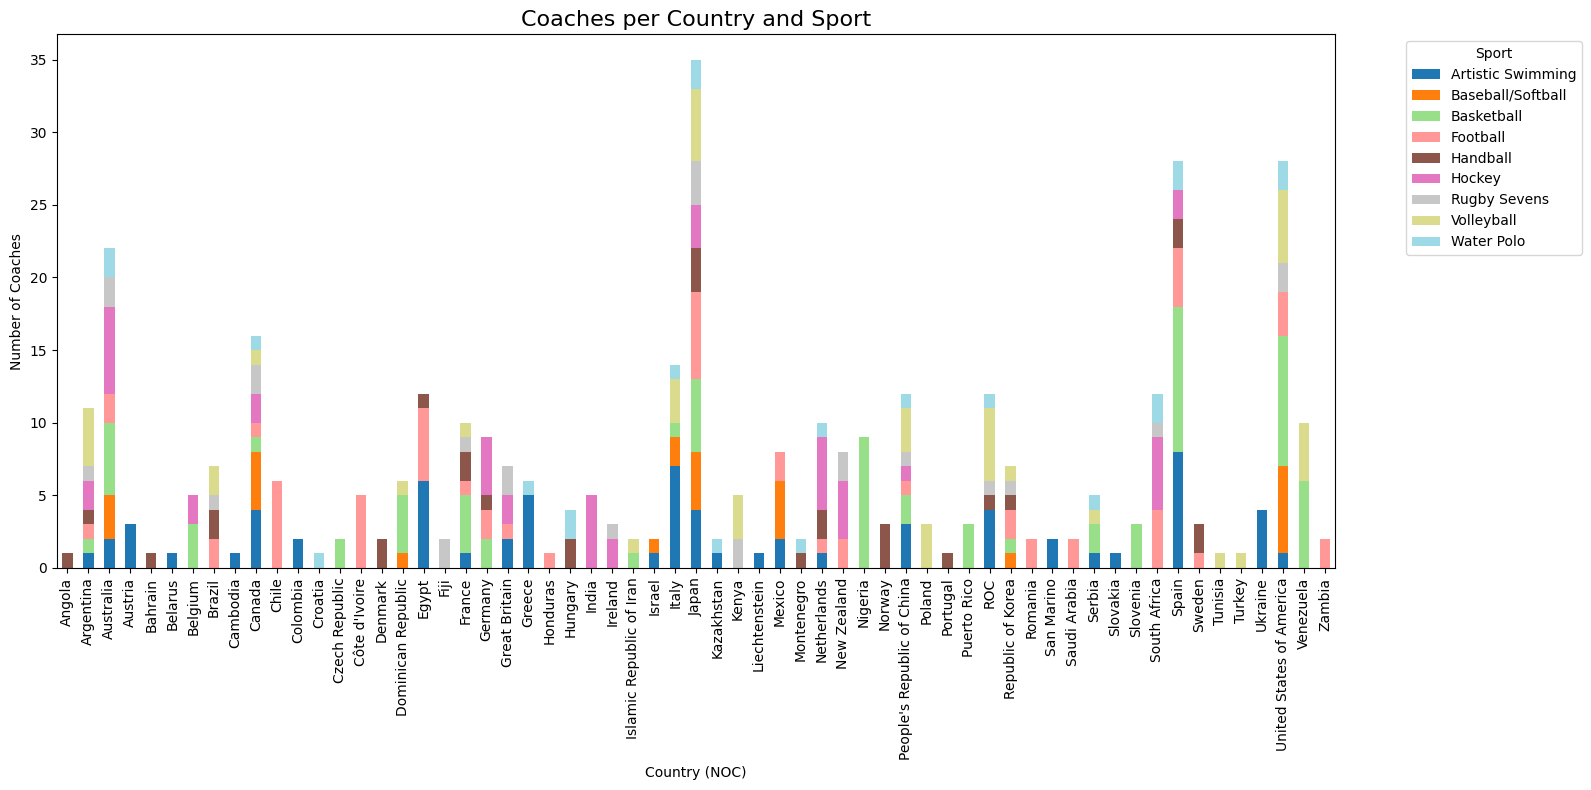

In [14]:

# Group by country and discipline, then count coaches
country_sport_counts = coaches_df.groupby(['NOC', 'Discipline']).size().unstack(fill_value=0)

# Plot the stacked bar chart
country_sport_counts.plot(kind='bar', figsize=(16, 8), stacked=True, colormap='tab20')

plt.title('Coaches per Country and Sport', fontsize=16)
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Coaches')
plt.xticks(rotation=90)
plt.legend(title='Sport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Insights found from the chart

Japan leads with nearly 35 coaches, making it the top contributor. Spain and the USA follow closely, each sending just under 30 coaches. Among sports, Artistic Swimming and Basketball stand out as the disciplines with the highest number of coaches, highlighting their strong organizational support and team size.

#### Chart - 6

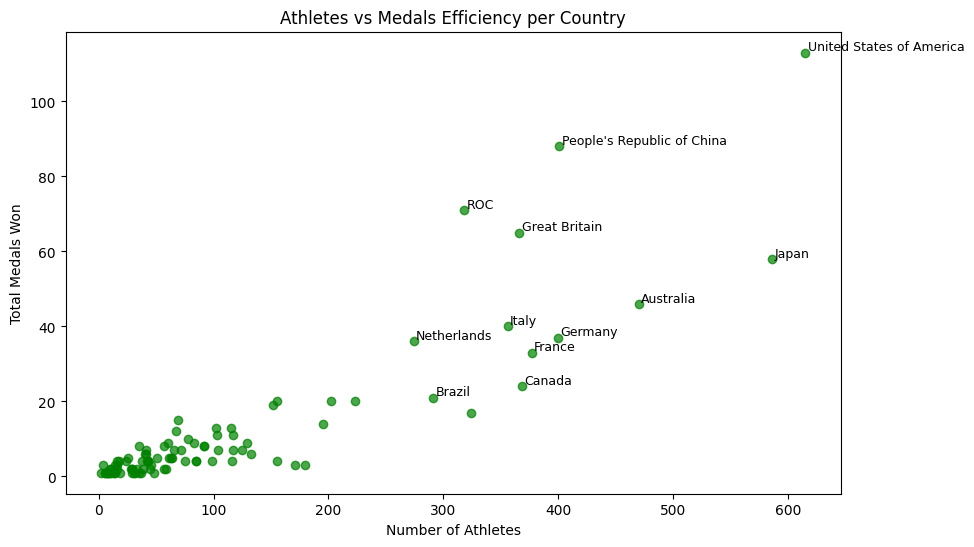

In [15]:

# Count number of athletes per country
athletes_per_country = athletes_df['NOC'].value_counts().reset_index()
athletes_per_country.columns = ['NOC', 'Num_Athletes']

# Merge with medals dataset
efficiency_df = athletes_per_country.merge(
    medals_df[['Team/NOC', 'Total']],
    left_on='NOC', right_on='Team/NOC'
)

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(efficiency_df['Num_Athletes'], efficiency_df['Total'], color='green', alpha=0.7)
plt.title('Athletes vs Medals Efficiency per Country')
plt.xlabel('Number of Athletes')
plt.ylabel('Total Medals Won')
 # annotate top countries
for i, row in efficiency_df.iterrows():
    if row['Total'] > 20:  # annotate only countries with more than 20 medals
        plt.text(row['Num_Athletes']+2, row['Total']+0.5, row['NOC'], fontsize=9)
plt.show()


### Insights found from the chart

USA leads the efficiency chart with both a high number of athletes and the most medals, placing it at the top-right. Japan, despite sending almost as many athletes, appears less efficient in terms of medals won. Other notable countries like ROC, Great Britain, and Australia show strong efficiency, balancing a smaller delegation with a high medal count, highlighting their competitive performance relative to team size.

#### Chart - 7

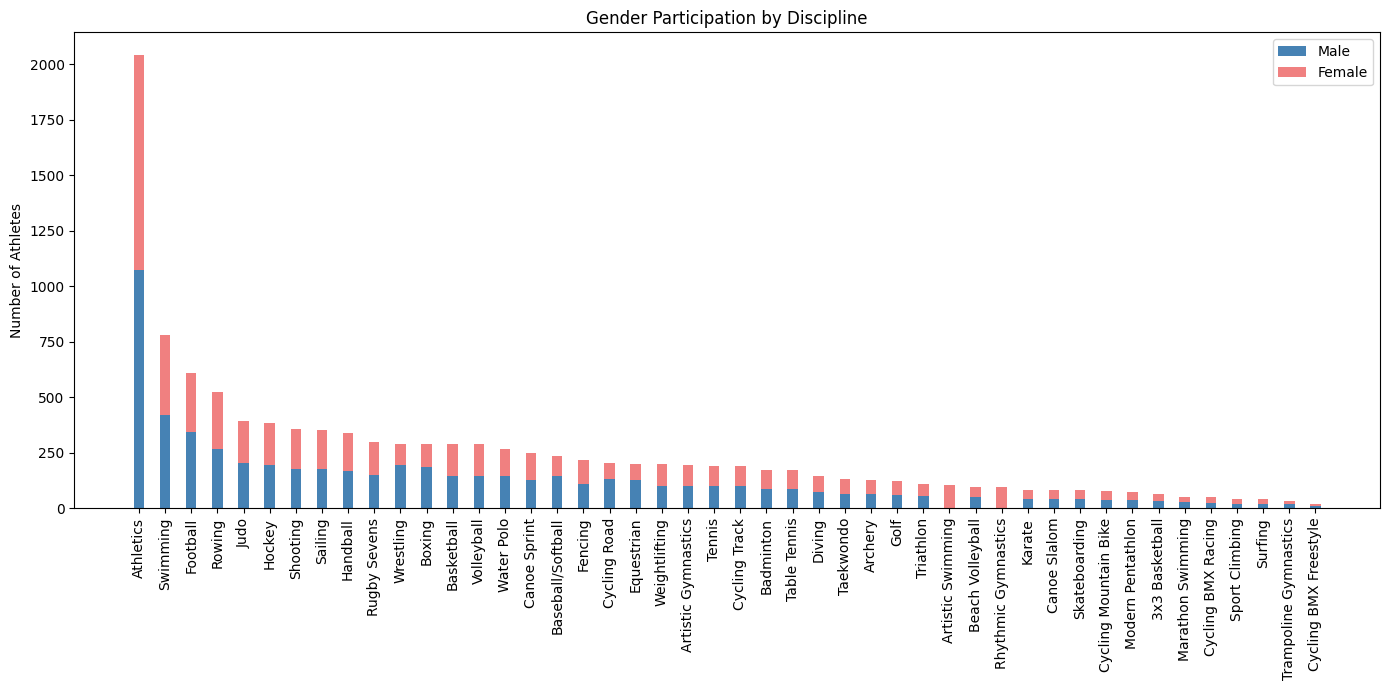

In [18]:

# Sort by total participation
gender_df = gender_df.sort_values(by='Total', ascending=False)

# Plot
plt.figure(figsize=(14, 7))
bar_width = 0.4
x = range(len(gender_df))

plt.bar(x, gender_df['Male'], width=bar_width, label='Male', color='steelblue')
plt.bar(x, gender_df['Female'], width=bar_width, label='Female', color='lightcoral', bottom=gender_df['Male'])

plt.xticks(x, gender_df['Discipline'], rotation=90)
plt.ylabel('Number of Athletes')
plt.title('Gender Participation by Discipline')
plt.legend()
plt.tight_layout()
plt.show()


### Insights found from the chart

The gender participation chart shows clear patterns across disciplines. Athletics has a roughly even spread of male and female athletes, while sports like football, wrestling and boxing are heavily male-dominated. On the other end, artistic swimming and gymnastics are almost entirely female-dominated, highlighting stark gender splits in certain Olympic events.


# **Conclusion**

For this project, I started by uploading the Tokyo 2020 Olympics dataset and explored its structure, dimensions and column details to fully understand the variables. I reviewed data types, identified key features like athlete details, sports categories, medal counts and gender distribution and performed some preprocessing steps to ensure accuracy. From there, I examined the relationships between athletes, teams, coaches and medals setting up the foundation for deeper analysis.

My analysis focused on uncovering meaningful trends in participation, performance and gender representation. I found that the United States dominated both gold and total medal counts, followed closely by China in golds, while countries like Japan, Australia and Great Britain also performed strongly. Athletics was the largest sport by participation, while swimming, football and rowing drew large athlete pools too. Gender distribution across the Olympics was close to equal (52% male, 48% female), but certain sports were heavily skewed toward one gender. By examining medal efficiency and coaching support, I highlighted how investment and specialization shape outcomes, with some smaller delegations punching above their weight. Together, these insights create a clear picture of global sporting strengths, diversity and competitive focus at Tokyo 2020.

### ***Hurrah! You have successfully completed your EDA Project !!!***